## Data ingestion

In [1]:
#importación de librerías
import pandas as pd # para manejo de datos
import numpy as np #para manejo de matrices y vectores
import plotly.express as px # gráficos
import plotly.graph_objs as go # gráficos
import seaborn as sns # gráficos
from sklearn.impute import SimpleImputer # para imputación
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.model_selection import RepeatedKFold
import joblib
import openpyxl

In [2]:
### Cargar tablas de datos desde github ###
retirement_info ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/retirement_info.csv'
general_data= 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/general_data.csv'
employee_survey_data ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/employee_survey_data.csv'
out_time = 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/out_time.csv'
in_time = 'https://raw.githubusercontent.com/jhansanchez/casome/main/datos/in_time.csv'
manager_survey_data ='https://raw.githubusercontent.com/jhansanchez/casome/main/datos/manager_survey_data.csv'

In [3]:
df_general = pd.read_csv(general_data) # datos generales de los empleados
df_manager_s = pd.read_csv(manager_survey_data) #encuesta del gerente de desempeño de los empleados
df_retirement = pd.read_csv(retirement_info) # información de empleados que se retiran de la empresa
df_employee_s = pd.read_csv(employee_survey_data) # encuesta de los empleados nivel de satisfacción laboral
#df_in= pd.read_csv(in_time) # el horario de ingreso de cada empleado
#df_out= pd.read_csv(out_time) # el horario de salida de cada empleado 

Exploración de las bases de datos

In [4]:
df_general.head(5)	

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df_manager_s.head(5)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [6]:
df_employee_s.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
df_retirement.head(5)

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/7/2016,Resignation,Stress
2,14,Yes,8/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,8/2/2016,Resignation,Salary


In [8]:
#df_in


In [9]:
#df_out.head(5)

## Comprensión y limpieza de datos

 En esta sección se exploran las bases de datos de una forma más detallada, adicionalmente se realizará la eliminación de variables necesarias, tratamiento de datos nulos, homologación de variables y cambio de tipo de variable. 

### 1.  'df_general' = datos generales de los empleados 

In [10]:
df_general.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


#### 1.1 Eliminación de variables 

In [11]:
#eliminar las variables "EmployeeCount", "Over18" y "StandardHours"
#"EmployeeCount": la variable solo cuenta con una categoría, siendo el valor de 1, se encuentra que no aporta información significativa en el estudio. 
#"Over18": la variable solo cuenta con una categoría, siendo el valor de "Y", se encuentra que no aporta informacion significativa debido a que todas las personas de la empresa son mayores de edad.
#"StandardHours":  la variable solo cuenta con una categoría, siendo el valor de 8, se encuentra que no aporta informacion significativa debido a que todas las personas trabajan 8 horas al día.
df_general = df_general.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1) #Eliminación de variables 

#### 1.2 Tratamiento de datos nulos

In [12]:
df_general.info() #De las 23 variables, solo dos presentan datos nulos y tipo de variable mal asignado, siendo estas: "NumCompaniesWorked", "TotalWorkingYears"
#"NumCompaniesWorked" = 19 nulos, tipo de variable asignado= float, tipo de variable correcto = int 
#"TotalWorkingYears" = 9 nulos, tipo de variable asignado= float, tipo de variable correcto = int 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [13]:
df_general.columns #visualizar todas las columnas

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
df_general[df_general['NumCompaniesWorked'].isnull()] #filtrar las filas que tienen nulos en la variable "NumCompaniesWorked"

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,Travel_Rarely,Sales,2,3,Life Sciences,116,Male,1,Sales Executive,Divorced,23670,NaN,12,1,5.0,2,5,0,4
210,52,Travel_Rarely,Sales,2,1,Medical,211,Male,1,Laboratory Technician,Divorced,99800,NaN,11,1,18.0,2,10,6,9
343,40,Travel_Frequently,Sales,9,3,Marketing,344,Male,3,Manufacturing Director,Single,22380,NaN,14,0,10.0,3,1,0,0
476,22,Travel_Rarely,Research & Development,8,3,Other,477,Male,2,Sales Representative,Married,49070,NaN,21,1,4.0,2,4,1,1
647,29,Travel_Rarely,Research & Development,3,3,Technical Degree,648,Female,2,Healthcare Representative,Divorced,48050,NaN,16,1,9.0,2,7,1,7
799,29,Travel_Frequently,Research & Development,28,3,Medical,800,Female,5,Research Scientist,Single,44340,NaN,17,3,7.0,1,5,0,0
932,32,Travel_Rarely,Research & Development,5,4,Technical Degree,933,Male,5,Research Scientist,Divorced,50030,NaN,13,0,10.0,5,9,1,6
1103,26,Travel_Frequently,Sales,16,2,Life Sciences,1104,Male,2,Healthcare Representative,Married,83800,NaN,14,0,8.0,3,7,7,7
1312,37,Travel_Rarely,Human Resources,9,3,Human Resources,1313,Male,2,Healthcare Representative,Divorced,54840,NaN,17,0,7.0,4,3,0,2
1521,31,Travel_Rarely,Research & Development,20,1,Technical Degree,1522,Female,3,Research Scientist,Married,99070,NaN,13,1,6.0,3,5,0,3


In [15]:
#conocer el porcentaje de nulos de la variable 'NumCompaniesWorked'
round(df_general['NumCompaniesWorked'].isnull().sum()/df_general['NumCompaniesWorked'].size, 6)*100 

0.4308

In [16]:
df_general[df_general['TotalWorkingYears'].isnull()] #filtrar las filas que tienen nulos en la variable "TotalWorkingYears"

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,Travel_Rarely,Research & Development,4,4,Life Sciences,24,Male,1,Manufacturing Director,Married,89260,1.0,14,0,NaN,4,20,11,6
137,43,Travel_Frequently,Sales,14,3,Life Sciences,138,Female,1,Manufacturing Director,Married,37480,7.0,14,2,NaN,3,3,1,2
308,47,Travel_Frequently,Research & Development,4,3,Life Sciences,309,Male,1,Research Director,Single,27740,4.0,13,1,NaN,2,5,1,3
574,37,Travel_Rarely,Research & Development,23,3,Life Sciences,575,Male,3,Manufacturing Director,Divorced,166590,7.0,16,1,NaN,2,6,1,3
1517,36,Non-Travel,Research & Development,5,4,Life Sciences,1518,Male,1,Sales Executive,Married,85780,7.0,21,0,NaN,4,9,0,8
2367,39,Travel_Rarely,Sales,2,4,Life Sciences,2368,Male,1,Laboratory Technician,Divorced,72640,0.0,17,0,NaN,5,10,0,7
3120,35,Travel_Rarely,Research & Development,12,2,Medical,3121,Female,2,Sales Representative,Married,28090,4.0,23,1,NaN,2,8,0,0
3818,28,Travel_Rarely,Human Resources,1,3,Medical,3819,Female,2,Laboratory Technician,Married,24130,1.0,16,1,NaN,2,1,0,0
4409,40,Travel_Rarely,Research & Development,28,3,Medical,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,12,0,NaN,6,21,3,9


In [17]:
df_general['TotalWorkingYears'].value_counts().head(5)

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
Name: TotalWorkingYears, dtype: int64

In [18]:
#conocer el porcentaje de nulos de la variable "TotalWorkingYears"
round(df_general['TotalWorkingYears'].isnull().sum()/df_general['TotalWorkingYears'].size, 6)*100 

0.20409999999999998

A pesar de que las dos variables que tienen nulos en esta base de datos, no son valores muy elevados:

'TotalWorkingYears' = 0.2%
'NumCompaniesWorked' = 0.4%

No se eliminaran estos registros, debido a que por si la base de datos no contiene muchos datos, lo que generaría a futuro que los modelos predictivos que se construyan, posiblemente no cuenten con la suficiente información para un buen entrenamiento. Por consiguiente, a continuación se muestra como se imputaran los valores nulos de las dos variables.

In [19]:
# Para la variable'NumCompaniesWorked', se aplicara la imputación del valor que más se repite, siendo este valor de 1
# es decir, que de las 19 personas que no se tiene información del número de empresas en las que ha trabajado se pondrá 1
df_general['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [20]:
df_n=df_general[['NumCompaniesWorked']] #Filtrar la variable a imputar 
imputer_n=SimpleImputer(strategy='most_frequent') #Llamar la técnica de imputación
imputer_n.fit(df_n) 
X_n=imputer_n.transform(df_n)
df_n=pd.DataFrame(X_n,columns=df_n.columns) # Convertir a DataFrame
df_general = df_general.drop(['NumCompaniesWorked'], axis = 1) # Eliminar la variable con nulos
df_general =pd.concat([df_general,df_n],axis=1) #Unir la variable imputada con el resto de variables

In [21]:
df_general['TotalWorkingYears'].value_counts() #Analizar que método de imputación aplicar

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
2.0      93
14.0     93
20.0     89
18.0     81
19.0     66
23.0     66
22.0     62
24.0     54
26.0     42
25.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
33.0     21
30.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [22]:
# Para la variable'TotalWorkingYears', se aplicara la imputación de la mediana, siendo este valor de 10 
# es decir, que de las 9 personas que no se tiene información del total de años trabajados se pondrá 10 años
df_general['TotalWorkingYears'].median()

10.0

In [23]:
df_t=df_general[['TotalWorkingYears']] #Filtrar la variable a imputar 
imputer_t=SimpleImputer(strategy='median') #Llamar la técnica de imputación
imputer_t.fit(df_t) 
X_t=imputer_t.transform(df_t)
df_t=pd.DataFrame(X_t,columns=df_t.columns) # Convertir a DataFrame
df_general = df_general.drop(['TotalWorkingYears'], axis = 1) # Eliminar la variable con nulos
df_general =pd.concat([df_general,df_t],axis=1) #Unir la variable imputada con el resto de variables

In [24]:
df_general.isnull().sum() # Comprobar la no existencia de nulos

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
PercentSalaryHike          0
StockOptionLevel           0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
NumCompaniesWorked         0
TotalWorkingYears          0
dtype: int64

#### 1.3 Verificación de homologación de variables

In [25]:

obj = (df_general.dtypes == object) #Filtrar variables categóricas
obj_cols = [c for c in obj.index if obj[c]] 
df_general_obj = df_general[obj_cols]

In [26]:
lista = df_general_obj.columns
for i in lista:
    print(i)
    print(df_general[i].value_counts())
    print('______________________________________________________')

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
______________________________________________________
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
______________________________________________________
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64
______________________________________________________
Gender
Male      2646
Female    1764
Name: Gender, dtype: int64
______________________________________________________
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Direc

In [27]:
lista = [ 'JobRole', 'MaritalStatus']
for i in lista:
    print(i)
    print(df_general_obj[i].value_counts())
    print('______________________________________________________')

JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64
______________________________________________________
MaritalStatus
Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64
______________________________________________________


In [28]:
df_general['StockOptionLevel'].value_counts() #Se comprobó que no hay variables que necesiten homologación

0    1893
1    1788
2     474
3     255
Name: StockOptionLevel, dtype: int64

#### 1.4 Verificación del tipo de variable

In [29]:
#Comprobar la correcta asignación de tipo de variable, donde se encuentra dos:
#'NumCompaniesWorked' -> tipo de variable asignado= float, tipo de variable correcto = int 
#'TotalWorkingYears' ->  tipo de variable asignado= float, tipo de variable correcto = int 
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TrainingTimesLastYear   

In [30]:
#Cambio tipo de variable 
df_general= df_general.astype({'TotalWorkingYears' : int, 'NumCompaniesWorked' : int })

### 2. 'df_manager_s' = encuesta al gerente sobre los empleados


 #### 2.1 Eliminación de variables

In [31]:
df_manager_s.head(5) #No es necesario eliminar ninguna variable

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


#### 2.2 Tratamiento de datos nulos

In [32]:
df_manager_s.info() # No hay nulos y el tipo de variable esta bien asignado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


#### 2.3 Verificación de homologación de variables

In [33]:
#Conocer cuantas y cuales categorías existen en la base df_employee_s, además el numero de datos por categoría
lista = [ 'JobInvolvement', 'PerformanceRating']
for i in lista:
    print(i)
    print(df_manager_s[i].value_counts())
    print('______________________________________________________')

JobInvolvement
3    2604
2    1125
4     432
1     249
Name: JobInvolvement, dtype: int64
______________________________________________________
PerformanceRating
3    3732
4     678
Name: PerformanceRating, dtype: int64
______________________________________________________


Se comprobó que no hay variables que necesiten homologación

#### 2.4 Verificación del tipo de variable

In [34]:
df_manager_s.info() #todas las variables tienen asignada correctamente el tipo de variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


Nota: no fue necesario hacer ningún tipo de modificación en esta base de datos

### 3. df_employee_s' = encuesta a los empleados sobre satisfacción laboral 

 #### 3.1 Eliminación de variables

In [35]:
df_employee_s.head(5) # No es necesario eliminar ninguna variable

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


#### 3.2 Tratamiento de datos nulos

In [36]:
df_employee_s.info() 
# Hay nulos en las 3 de las 4 variables de la base de datos, siendo estas: "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance"
#"EnvironmentSatisfaction" = 25 nulos
#"JobSatisfaction" = 20 nulos
#"WorkLifeBalance" = 38 nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [37]:
df_employee_s.isnull().sum() #total de nulos por variable

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [38]:
df_employee_s[df_employee_s['EnvironmentSatisfaction'].isnull()] #filtrar las filas que tienen nulos en la variable "EnvironmentSatisfaction"

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
11,12,NaN,4.0,3.0
111,112,NaN,2.0,3.0
195,196,NaN,3.0,2.0
300,301,NaN,4.0,3.0
405,406,NaN,4.0,2.0
489,490,NaN,4.0,3.0
678,679,NaN,2.0,3.0
846,847,NaN,3.0,2.0
909,910,NaN,4.0,2.0
1077,1078,NaN,4.0,3.0


In [39]:
df_employee_s[df_employee_s['JobSatisfaction'].isnull()] #filtrar las filas que tienen nulos en la variable "JobSatisfaction"

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
40,41,3.0,NaN,3.0
124,125,3.0,NaN,3.0
313,314,1.0,NaN,3.0
586,587,3.0,NaN,3.0
859,860,2.0,NaN,2.0
1195,1196,2.0,NaN,2.0
1468,1469,4.0,NaN,3.0
1678,1679,2.0,NaN,3.0
1909,1910,3.0,NaN,3.0
2182,2183,3.0,NaN,3.0


In [40]:
df_employee_s[df_employee_s['WorkLifeBalance'].isnull()] #filtrar las filas que tienen nulos en la variable "WorkLifeBalance "

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
84,85,3.0,4.0,NaN
273,274,3.0,4.0,NaN
483,484,4.0,3.0,NaN
609,610,4.0,1.0,NaN
735,736,1.0,3.0,NaN
861,862,3.0,2.0,NaN
987,988,1.0,4.0,NaN
1092,1093,1.0,3.0,NaN
1197,1198,3.0,3.0,NaN
1260,1261,1.0,4.0,NaN


Nota: todos los los nulos existentes se encuentran en registros diferentes, por lo que en total se tienen 88 nulos en entradas de registro diferentes

In [41]:
round(df_employee_s.isnull().sum()/df_employee_s.size, 6)*100 #conocer el porcentaje de nulos de las variables

EmployeeID                 0.0000
EnvironmentSatisfaction    0.1417
JobSatisfaction            0.1134
WorkLifeBalance            0.2154
dtype: float64

A pesar de que las dos variables que tienen nulos en esta base de datos, no son valores muy elevados

No se eliminaran estos registros, por las razones expuestas en el tratamiento de datos nulos de la base 'df_general'. Por consiguiente, a continuación se muestra como se imputaran los valores nulos de las tres variables.

In [42]:
lista = [ 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance'] #Conocer la media de las variables
for i in lista:
    print(i)
    print(df_employee_s[i].median())
    print('______________________________________________________')


EnvironmentSatisfaction
3.0
______________________________________________________
JobSatisfaction
3.0
______________________________________________________
WorkLifeBalance
3.0
______________________________________________________


Al ser la mediana la misma para las tres variables se decide llenar los nulos con el valor de '3'

In [43]:
df_employee_s = df_employee_s.fillna(3) #Llenar todos los nulos con la mediana

In [44]:
df_employee_s.info() # no hay existencia de nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


#### 3.3 Verificación de homologación de variables

In [45]:
lista = [ 'JobSatisfaction', 'WorkLifeBalance','EnvironmentSatisfaction'] #Conocer cuantas y cuales categorías existen en la base df_employee_s, además el numero de datos por categoría
for i in lista:
    print(i)
    print(df_employee_s[i].value_counts())
    print('______________________________________________________')

JobSatisfaction
4.0    1367
3.0    1343
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64
______________________________________________________
WorkLifeBalance
3.0    2698
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64
______________________________________________________
EnvironmentSatisfaction
3.0    1375
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64
______________________________________________________


No es necesario hacer alguna modificación con relación a las categorías de las variables

#### 3.4 Verificación del tipo de variable

In [46]:
#Comprobar la correcta asignación de tipo de variable, donde se encuentra tres variables con mala asignación:
#'JobSatisfaction' -> tipo de variable asignado= float, tipo de variable correcto = int 
#'WorkLifeBalance' ->  tipo de variable asignado= float, tipo de variable correcto = int 
#'EnvironmentSatisfaction' ->  tipo de variable asignado= float, tipo de variable correcto = int 
df_employee_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4410 non-null   float64
 2   JobSatisfaction          4410 non-null   float64
 3   WorkLifeBalance          4410 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [47]:
#Cambio tipo de variable 
df_employee_s= df_employee_s.astype({'EnvironmentSatisfaction' : int, 'JobSatisfaction' : int, 'WorkLifeBalance' : int })

### 4. 'df_retirement' =  empleados retirados de la empresa


 #### 4.1 Eliminación de variables

In [48]:
df_retirement.head(5) # no es necesario eliminar ninguna variable

,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,2,Yes,15/10/2016,Resignation,Others
1,7,Yes,20/7/2016,Resignation,Stress
2,14,Yes,8/11/2016,Resignation,Others
3,29,Yes,15/10/2016,Resignation,Others
4,31,Yes,8/2/2016,Resignation,Salary


#### 4.2 Tratamiento de datos nulos

In [49]:
df_retirement.info() #existen datos nulos en la variable 'resignationReason' = razones de renuncia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         711 non-null    int64 
 1   Attrition          711 non-null    object
 2   retirementDate     711 non-null    object
 3   retirementType     711 non-null    object
 4   resignationReason  641 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [50]:
df_retirement.isnull().sum() #70 nulos en dicha variable

EmployeeID            0
Attrition             0
retirementDate        0
retirementType        0
resignationReason    70
dtype: int64

In [51]:
#se llenan los datos nulos con una nueva categoría llamada "no information"
df_retirement['resignationReason']= df_retirement['resignationReason'].fillna('No information')

#### 4.3 Verificación de homologación de variables

In [52]:
#Conocer cuantas y cuales categorías existen en la base df_retirement, además el numero de datos por categoría
lista = [ 'Attrition', 'retirementType', 'resignationReason']
for i in lista:
    print(i)
    print(df_retirement[i].value_counts())
    print('______________________________________________________')

Attrition
Yes    711
Name: Attrition, dtype: int64
______________________________________________________
retirementType
Resignation    641
Fired           70
Name: retirementType, dtype: int64
______________________________________________________
resignationReason
Others            323
Salary            189
Stress            129
No information     70
Name: resignationReason, dtype: int64
______________________________________________________


No es necesario hacer ninguna homologación 

#### 4.4 Verificación del tipo de variable

In [53]:
#Comprobar la correcta asignación de tipo de variable, donde se encuentra una variable con mala asignación:
#'retirementDate ' -> tipo de variable asignado= object, tipo de variable correcto =  
 
df_retirement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         711 non-null    int64 
 1   Attrition          711 non-null    object
 2   retirementDate     711 non-null    object
 3   retirementType     711 non-null    object
 4   resignationReason  711 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [54]:
df_retirement['retirementDate'] = pd.to_datetime(df_retirement['retirementDate']) #asignar tipo de variable de fehca 

### 5. "in_time" y 6. "out_time" 
    Nota: no se tendrán en cuenta estas bases de datos debido a que no se encontrarón relvantes para el estudio. 

## Análisis exploratorio

In [55]:
#¿Cuáles son los puntajes promedio de la encuesta de empleados que se retiraron?
df = pd.merge(df_retirement, df_employee_s, how = 'left', on = 'EmployeeID')
df.describe().drop('EmployeeID', axis = 1)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,711.000000,711.000000,711.000000
mean,2.472574,2.471167,2.662447
std,1.163540,1.115296,0.814471
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000


In [56]:
#¿Cuáles son los puntajes promedio de la encuesta de empleados que aún continuan en la empresa?
df5 = pd.merge(df_retirement, df_employee_s, how = 'right', on = 'EmployeeID')
df5['Attrition'] = df5['Attrition'].fillna('No')
df5[df5['Attrition'] == 'No'].describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,3699.000000,3699.000000,3699.000000,3699.000000
mean,2208.139497,2.773723,2.779129,2.782914
std,1273.944391,1.068453,1.088877,0.678552
min,1.000000,1.000000,1.000000,1.000000
25%,1110.500000,2.000000,2.000000,2.000000
50%,2213.000000,3.000000,3.000000,3.000000
75%,3304.500000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


<Figure size 1200x240 with 0 Axes>

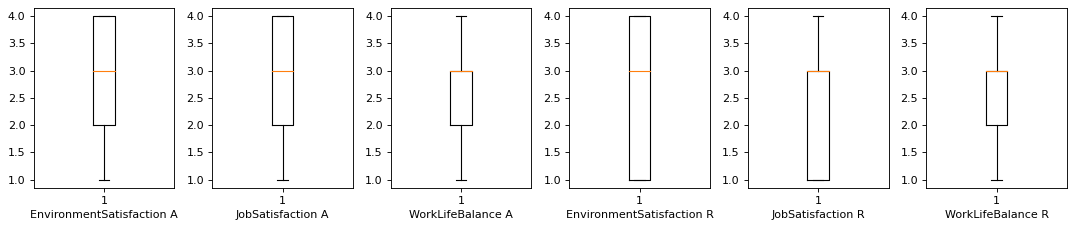

In [57]:
#¿Cómo es el comportamiento de los puntajes de la satisfacción de los empleados comparando activos y retirados, representados en un BoxPlot?
df3 = df5[df5['Attrition'] == 'No'].drop(['retirementDate', 'retirementType', 'resignationReason'], axis = 1).rename(columns= {'JobSatisfaction' : 'JobSatisfaction A', 'WorkLifeBalance' : 'WorkLifeBalance A', 'EnvironmentSatisfaction' : 'EnvironmentSatisfaction A' })
df6 = pd.merge(df3, df, how = 'outer').drop(['retirementDate', 'retirementType', 'resignationReason'], axis = 1).rename(columns= {'JobSatisfaction' : 'JobSatisfaction R', 'WorkLifeBalance' : 'WorkLifeBalance R', 'EnvironmentSatisfaction' : 'EnvironmentSatisfaction R' })
figure(figsize=(15, 3), dpi=80);

# graficar Score
figure(figsize =(18,3), dpi = 80)
j = 1
for i in df6.columns[2:]:
  plt.subplot(1,8,j)
  plt.tight_layout()
  plt.boxplot(df6[df6[i].notnull()][i])
  plt.xlabel(i)
  j = j+1;

<Figure size 1200x240 with 0 Axes>

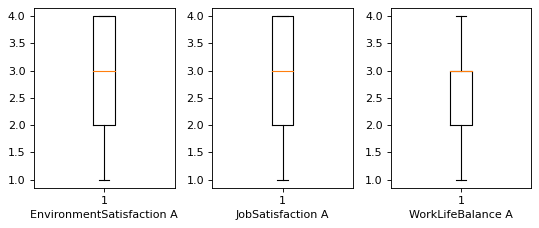

In [58]:
figure(figsize=(15, 3), dpi=80);

# graficar Score
figure(figsize =(18,3), dpi = 80)
j = 1
for i in df3.columns[2:]:
  plt.subplot(1,8,j)
  plt.tight_layout()
  plt.boxplot(df3[df3[i].notnull()][i])
  plt.xlabel(i)
  j = j+1;

In [59]:
#¿Cuáles son los puntajes promedio de la calificación del gerente de las personas que se retiraron?
df = pd.merge(df_retirement, df_manager_s, how = 'left', on = 'EmployeeID')
df.describe().drop('EmployeeID', axis = 1)

,JobInvolvement,PerformanceRating
count,711.000000,711.000000
mean,2.704641,3.172996
std,0.761739,0.378510
min,1.000000,3.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,4.000000,4.000000


In [60]:
#¿Cuál es el rol en la compañia en el que más personas se retiraron?
df_GR = pd.merge(df_retirement, df_general, how = 'left', on = 'EmployeeID')
base = df_GR.groupby(['JobRole'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

fig = px.bar(base, x = 'JobRole', y='TotalPeople',
             title= '<b>Job role of retired employee<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width = 700)

fig.update_layout(
    xaxis_title = 'Job Role',
    yaxis_title = 'Total people',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

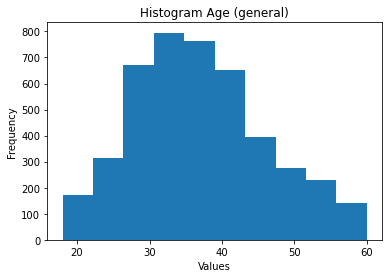

In [61]:
#¿Cúal es la edad de las personas de la compañía?
n, bins, patches=plt.hist(df_general['Age'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram Age (general)")
plt.show()

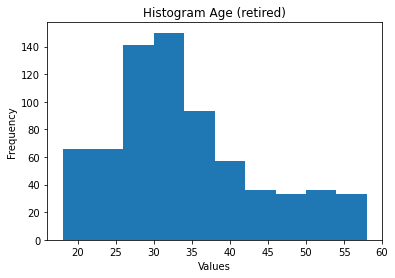

In [62]:
#¿Cuál es la edad en la que más personas se retiraron? 
n, bins, patches=plt.hist(df_GR['Age'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram Age (retired)")
plt.show()

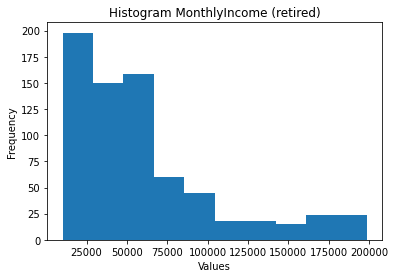

In [63]:
#Cuál es el salario de las personas que se retiraron?
n, bins, patches=plt.hist(df_GR['MonthlyIncome'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram MonthlyIncome (retired)")
plt.show()

In [64]:
#¿Cuál es el salario más alto y más bajo en la empresa?
print('Salario minimo: ', df_general['MonthlyIncome'].min())
print('Salario máximo: ', df_general['MonthlyIncome'].max())

Salario minimo:  10090
Salario máximo:  199990


In [65]:
#¿Cuál es el estado civil de las personas que se retiraron?
base = df_GR.groupby(['MaritalStatus'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()

fig = px.pie(base, values = 'TotalPeople', names= 'MaritalStatus',
             title= '<b>Marital status of retired employee<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,  
    margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [66]:
#¿Cuál es el porcentaje por género de retiros según las áreas de la empresa? 
df_GRA=df_GR.groupby(['Gender','Department']) [['Attrition']].count().rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df_GRA['%'] = round(df_GRA['TotalPeople']/df_GRA['TotalPeople'].sum()*100, 2)
df_GRA.drop('TotalPeople', axis=1)

,Gender,Department,%
0,Female,Human Resources,2.95
1,Female,Research & Development,25.74
2,Female,Sales,9.28
3,Male,Human Resources,5.06
4,Male,Research & Development,37.97
5,Male,Sales,18.99


In [67]:
#¿Qué tanto viajan las personas que renuncian con relación a las personas activas en la empresa?
df = df_GR.groupby(['BusinessTravel'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df['% Active'] = round(df['TotalPeople']/df['TotalPeople'].sum()*100, 2)
df.drop('TotalPeople', axis = 1, inplace = True)

df2 = pd.merge(df_retirement, df_general, how = 'right', on = 'EmployeeID')
df2['Attrition'] = df2['Attrition'].fillna('No')
df2 = df2[df2['Attrition'] == 'No'].groupby(['BusinessTravel'])[['Attrition']].count().sort_values('Attrition', ascending= False).rename(columns={'Attrition': 'TotalPeople'}).reset_index()
df2['% Retired'] = round(df2['TotalPeople']/df2['TotalPeople'].sum()*100, 2)
df2.drop('TotalPeople', axis = 1, inplace = True)
pd.merge(df, df2, how='inner', on = 'BusinessTravel')

,BusinessTravel,% Active,% Retired
0,Travel_Rarely,65.82,71.94
1,Travel_Frequently,29.11,16.87
2,Non-Travel,5.06,11.19


In [68]:
#¿Cómo se dividen los departamentos de la empresa?
base = df_general.groupby(['Department'])[['EmployeeID']].count().sort_values('EmployeeID', ascending = False).reset_index().rename(columns = {'EmployeeID': 'Total employees'}).head(10)
fig = px.pie(base, values = 'Total employees', names ='Department',
             title= '<b>Total employee by department<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout( 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [69]:
#¿Cuál es el departamento con mas retiros por renuncias y despidos en la empresa?
base = df_GR.groupby([df_GR['retirementType'], 'Department'])[['EmployeeID']].count().rename(columns = {'EmployeeID': 'Total retired employees'}).reset_index()
fig = px.sunburst(base, path=['retirementType', 'Department' ], values='Total retired employees', title= '<b>Department by retirements due to resignation and fired<b>', 
color_discrete_sequence=px.colors.qualitative.Dark2, width=600)

fig.show()

In [70]:
#¿Cuál es el porcentaje de retiros por departamento?
base['Total retired employees'] = base['Total retired employees'].apply(lambda x: "1,6%" if (x == 3) else "1,5%" if (x == 44) else "1,7%" if (x == 23)  else "28,6%" if (x == 54) else "14,2%" if (x == 409) else "13,3%" )
base = base.rename(columns= {'Total retired employees': 'TotalRetiredEmployees'})

fig = go.Figure(data=[go.Table( header=dict(values=[['<b>retirement Type</b>'],
                  ['<b>Department</b>'], ['<b>Total retired employees</b>']],
                    fill_color='#636EFA',
align='center',
                    font_size=20,
                    font_color = 'white',
                    height=25),
                    cells=dict(values=[base.retirementType, base.Department, base.TotalRetiredEmployees],
               fill_color='lavender',
               align=['center', 'center'], 
               font_size=20,
               height=40))])

fig.update_layout(width=650, height=700)
fig.show()

In [71]:
#Comportamiento de los retiros a través del tiempo en semanas
base = df_GR.groupby(['retirementDate'])[['Attrition']].count().reset_index()
base =base.resample('1W', on='retirementDate').sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base.retirementDate,
    y=base.Attrition,
    name = 'behavior of employee retirements over time'
))
fig.update_layout(title_text='behavior of employee retirements over time', title_x=0.5, width=1200)
fig.show()

In [72]:
#Comportamiento de los retiros a través del tiempo por meses
base1 =base.resample('1M', on='retirementDate').sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=base1.retirementDate,
    y=base1.Attrition,
    name = 'behavior of employee retirements over time'
))
fig.update_layout(title_text='Behavior of employee retirements over time', title_x=0.5, width=1200)
fig.show()

In [73]:
df_general1 = df_general[['Age', 'DistanceFromHome', 'EmployeeID','MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked', 'TotalWorkingYears'  ]]
df10 = pd.merge(df_employee_s, df_manager_s, on = 'EmployeeID', how='left')
df10 = pd.merge(df10, df_general1, on = 'EmployeeID', how='left')
df20 = pd.merge(df_retirement, df10, on = 'EmployeeID', how='left')
df20= df20.astype({'TotalWorkingYears' : int })
df40 = pd.merge(df10, df_retirement, on = 'EmployeeID', how='left')
df40 =df40.fillna('0').drop(['retirementDate', 'retirementType','resignationReason'], axis = 1)
df40['Attrition'] =df40['Attrition'].replace('Yes', 1).astype({'Attrition' : int })
df40= df40.astype({'TotalWorkingYears' : int }).drop(['EmployeeID'], axis = 1)

In [74]:
df40.corr() # correlacio de las variables

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,JobLevel,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,TotalWorkingYears,Attrition
EnvironmentSatisfaction,1.000000,-0.006036,0.023769,0.015410,0.014039,0.009699,0.020113,-0.005747,0.000850,0.000098,-0.024540,-0.004842,0.017885,0.015152,-0.006054,0.012947,-0.002433,-0.101625
JobSatisfaction,-0.006036,1.000000,-0.018527,0.004006,0.043147,-0.003003,-0.011213,0.004716,0.030626,-0.002098,-0.018596,0.039757,-0.021522,-0.016081,-0.024653,-0.055385,-0.016703,-0.103068
WorkLifeBalance,0.023769,-0.018527,1.000000,-0.018435,-0.022920,-0.020524,0.008305,0.003705,-0.040305,0.014343,-0.027763,-0.022701,-0.014834,0.009389,0.007358,-0.008771,0.001254,-0.062975
JobInvolvement,0.015410,0.004006,-0.018435,1.000000,0.010699,0.018196,-0.001837,0.023346,-0.004658,0.008314,-0.012630,0.010295,-0.010144,0.025395,-0.001372,0.028082,0.006778,-0.015588
PerformanceRating,0.014039,0.043147,-0.022920,0.010699,1.000000,-0.025563,0.036418,0.016093,0.773550,-0.011038,-0.002474,-0.036348,-0.022895,-0.020159,-0.009426,0.018604,-0.001458,0.023403
Age,0.009699,-0.003003,-0.020524,0.018196,-0.025563,1.000000,0.006963,-0.044314,-0.033137,0.311309,-0.002884,-0.031753,-0.027308,0.216513,0.202089,0.299186,0.680340,-0.159205
DistanceFromHome,0.020113,-0.011213,0.008305,-0.001837,0.036418,0.006963,1.000000,-0.021607,0.038125,0.031684,-0.037329,0.011169,-0.009001,0.002290,0.021584,-0.013069,0.009314,-0.009730
MonthlyIncome,-0.005747,0.004716,0.003705,0.023346,0.016093,-0.044314,-0.021607,1.000000,0.004325,0.000995,0.047316,0.026930,0.050112,0.065219,0.024304,-0.020222,-0.033758,-0.031176
PercentSalaryHike,0.000850,0.030626,-0.040305,-0.004658,0.773550,-0.033137,0.038125,0.004325,1.000000,-0.029707,0.010973,0.012548,-0.037392,-0.029542,-0.040864,0.031383,-0.018810,0.032533
YearsAtCompany,0.000098,-0.002098,0.014343,0.008314,-0.011038,0.311309,0.031684,0.000995,-0.029707,1.000000,-0.064219,0.007886,-0.007894,0.618409,0.769212,-0.116945,0.626737,-0.134392


In [75]:
#TotalWorkingYears * Attrition = -0.170162
#Age * Attrition = -0.159205
#YearsWithCurrManager * Attrition = -0.156199
#YearsAtCompany * Attrition = -0.134392
#Attrition * JobSatisfaction = -0.103068
#EnvironmentSatisfaction * Attrition = -0.101625


df40.corr().unstack().sort_values().head(15) # 15 correlaciones más fuertes negativas

TotalWorkingYears     Attrition                 -0.170162
Attrition             TotalWorkingYears         -0.170162
Age                   Attrition                 -0.159205
Attrition             Age                       -0.159205
                      YearsWithCurrManager      -0.156199
YearsWithCurrManager  Attrition                 -0.156199
Attrition             YearsAtCompany            -0.134392
YearsAtCompany        Attrition                 -0.134392
NumCompaniesWorked    YearsAtCompany            -0.116945
YearsAtCompany        NumCompaniesWorked        -0.116945
YearsWithCurrManager  NumCompaniesWorked        -0.108752
NumCompaniesWorked    YearsWithCurrManager      -0.108752
JobSatisfaction       Attrition                 -0.103068
Attrition             JobSatisfaction           -0.103068
                      EnvironmentSatisfaction   -0.101625
dtype: float64

In [76]:
x= df40.corr().unstack().sort_values() # 15 correlaciones más fuertes positivas
x[x<1].tail(20)


Age                      NumCompaniesWorked         0.299186
NumCompaniesWorked       Age                        0.299186
YearsAtCompany           Age                        0.311309
Age                      YearsAtCompany             0.311309
YearsSinceLastPromotion  TotalWorkingYears          0.404015
TotalWorkingYears        YearsSinceLastPromotion    0.404015
                         YearsWithCurrManager       0.458403
YearsWithCurrManager     TotalWorkingYears          0.458403
                         YearsSinceLastPromotion    0.510224
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsSinceLastPromotion  YearsAtCompany             0.618409
TotalWorkingYears        YearsAtCompany             0.626737
YearsAtCompany           TotalWorkingYears          0.626737
Age                      TotalWorkingYears          0.680340
TotalWorkingYears        Age                        0.680340
YearsAtCompany          

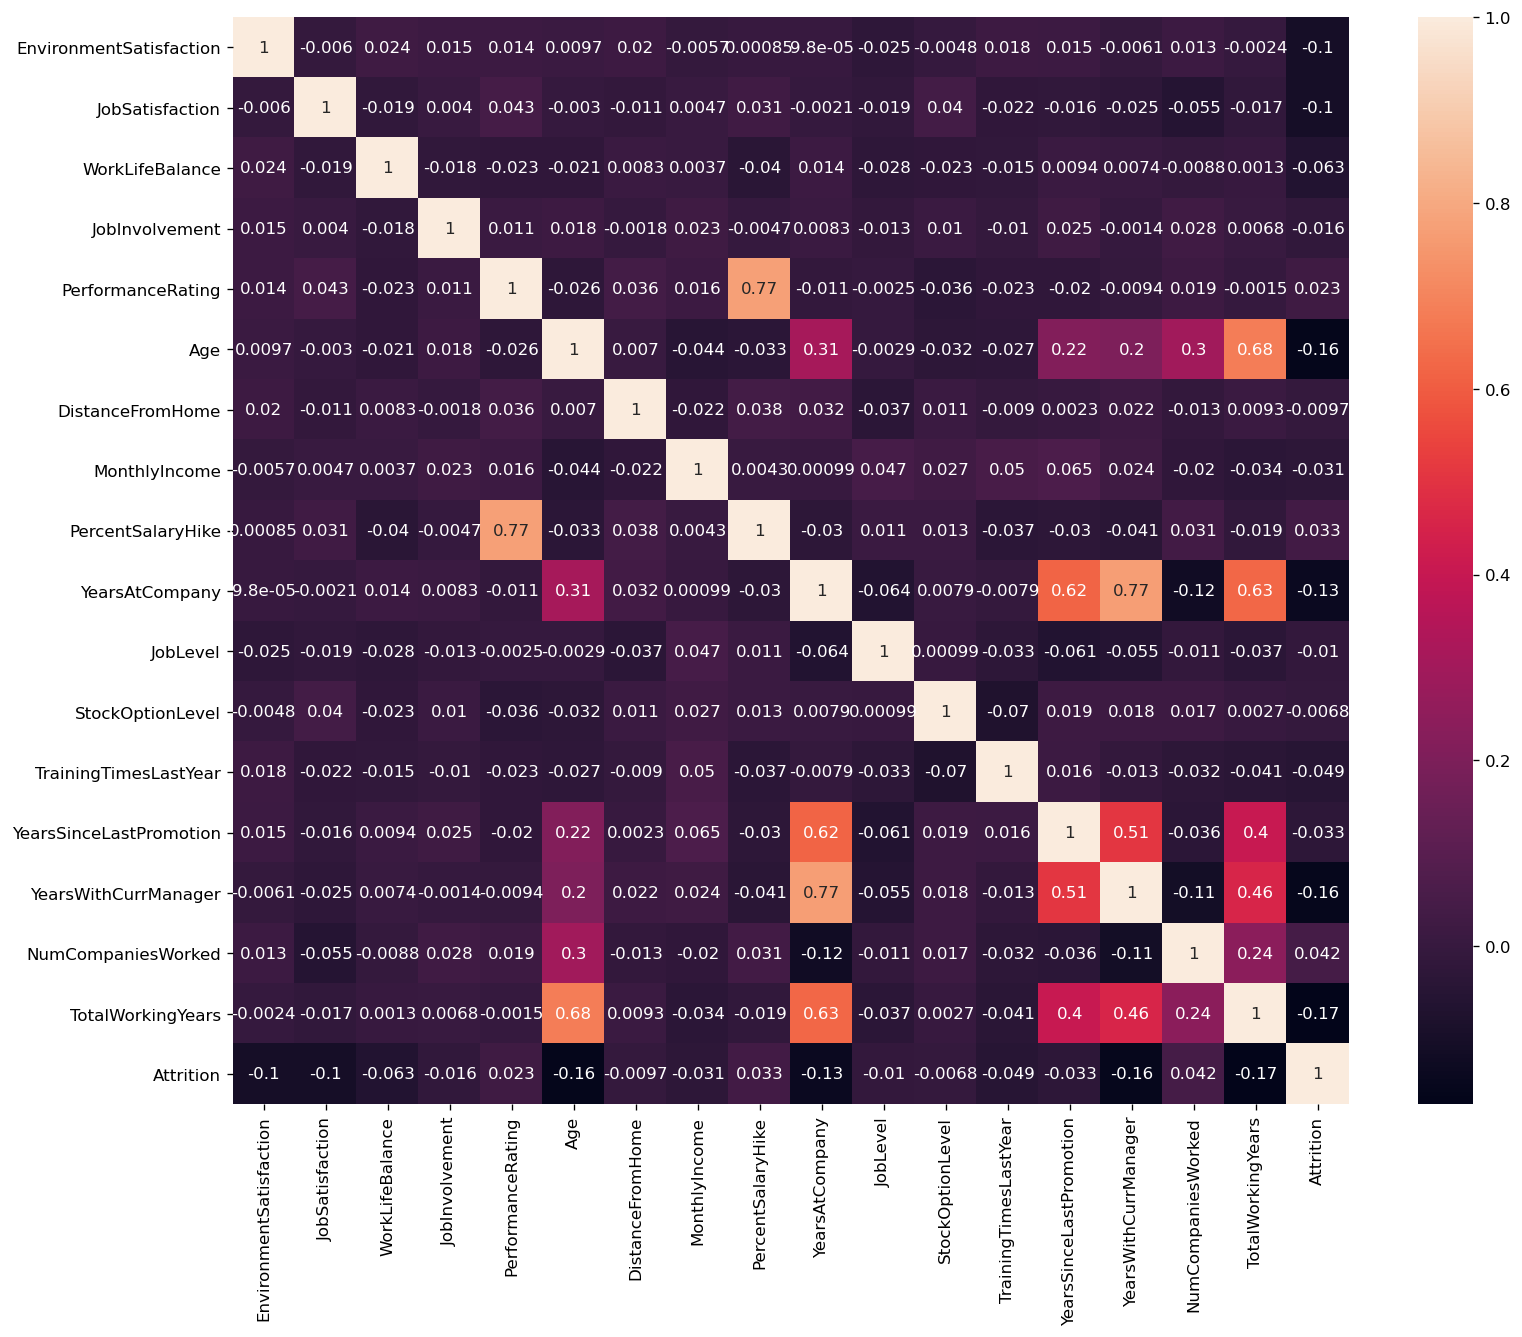

In [77]:
#mapa de calor con correlaciones
figure(figsize=(15, 12), dpi=120);
sns.heatmap(df40.corr(), annot = True);

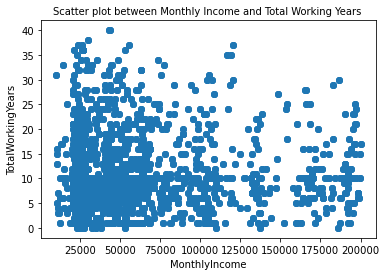

In [78]:
#¿existe alguna relación entre los ingresos mensuales y el total de años trabajados? 
plt.scatter(x = df_general['MonthlyIncome'], y =  df_general['TotalWorkingYears'])
plt.xlabel('MonthlyIncome',fontsize=10)
plt.ylabel('TotalWorkingYears',fontsize=10)
plt.title('Scatter plot between Monthly Income and Total Working Years ', fontsize=10);

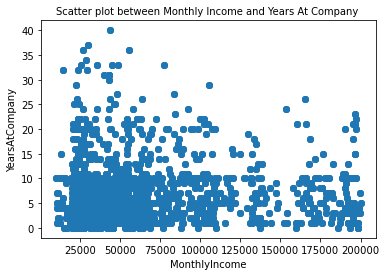

In [79]:

#¿existe alguna relación entre los ingresos mensuales y el total de años en la empresa? 
plt.scatter(x = df_general['MonthlyIncome'], y =  df_general['YearsAtCompany'])
plt.xlabel('MonthlyIncome',fontsize=10)
plt.ylabel('YearsAtCompany',fontsize=10)
plt.title('Scatter plot between Monthly Income and Years At Company ', fontsize=10);

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Attrition'>

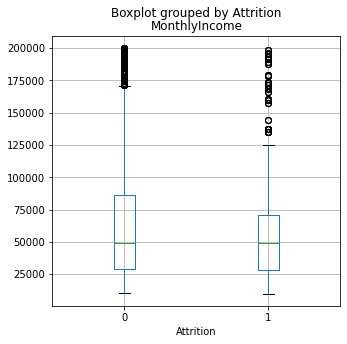

In [80]:
#Comportamiento de los ingresos salariales de las personas activas y retiradas 
df40.boxplot("MonthlyIncome", "Attrition", figsize=(5,5))

<AxesSubplot:title={'center':'PercentSalaryHike'}, xlabel='Attrition'>

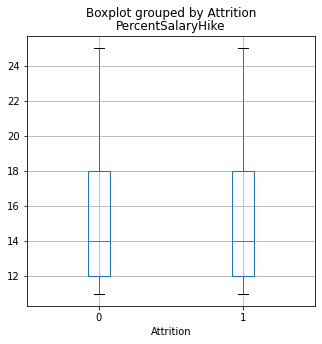

In [81]:
#Comportamiento de los porcentaje de aumento de salario de las personas activas y retiradas 
df40.boxplot("PercentSalaryHike", "Attrition", figsize=(5,5))

<AxesSubplot:title={'center':'YearsSinceLastPromotion'}, xlabel='Attrition'>

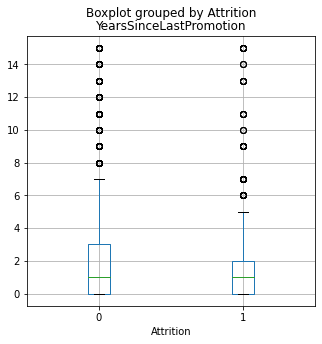

In [82]:
#Comportamiento de los años desde el último ascenso de las personas activas y retiradas 
df40.boxplot("YearsSinceLastPromotion", "Attrition", figsize=(5,5))


<AxesSubplot:title={'center':'NumCompaniesWorked'}, xlabel='Attrition'>

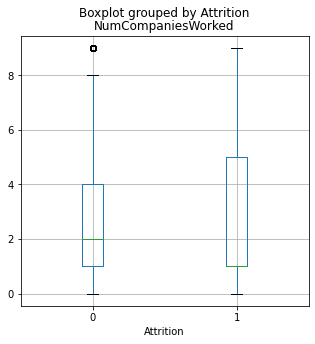

In [83]:
#Comportamiento del número de empresas en las que ha trabajado las personas activas y retiradas de la empresa
df40.boxplot("NumCompaniesWorked", "Attrition", figsize=(5,5))


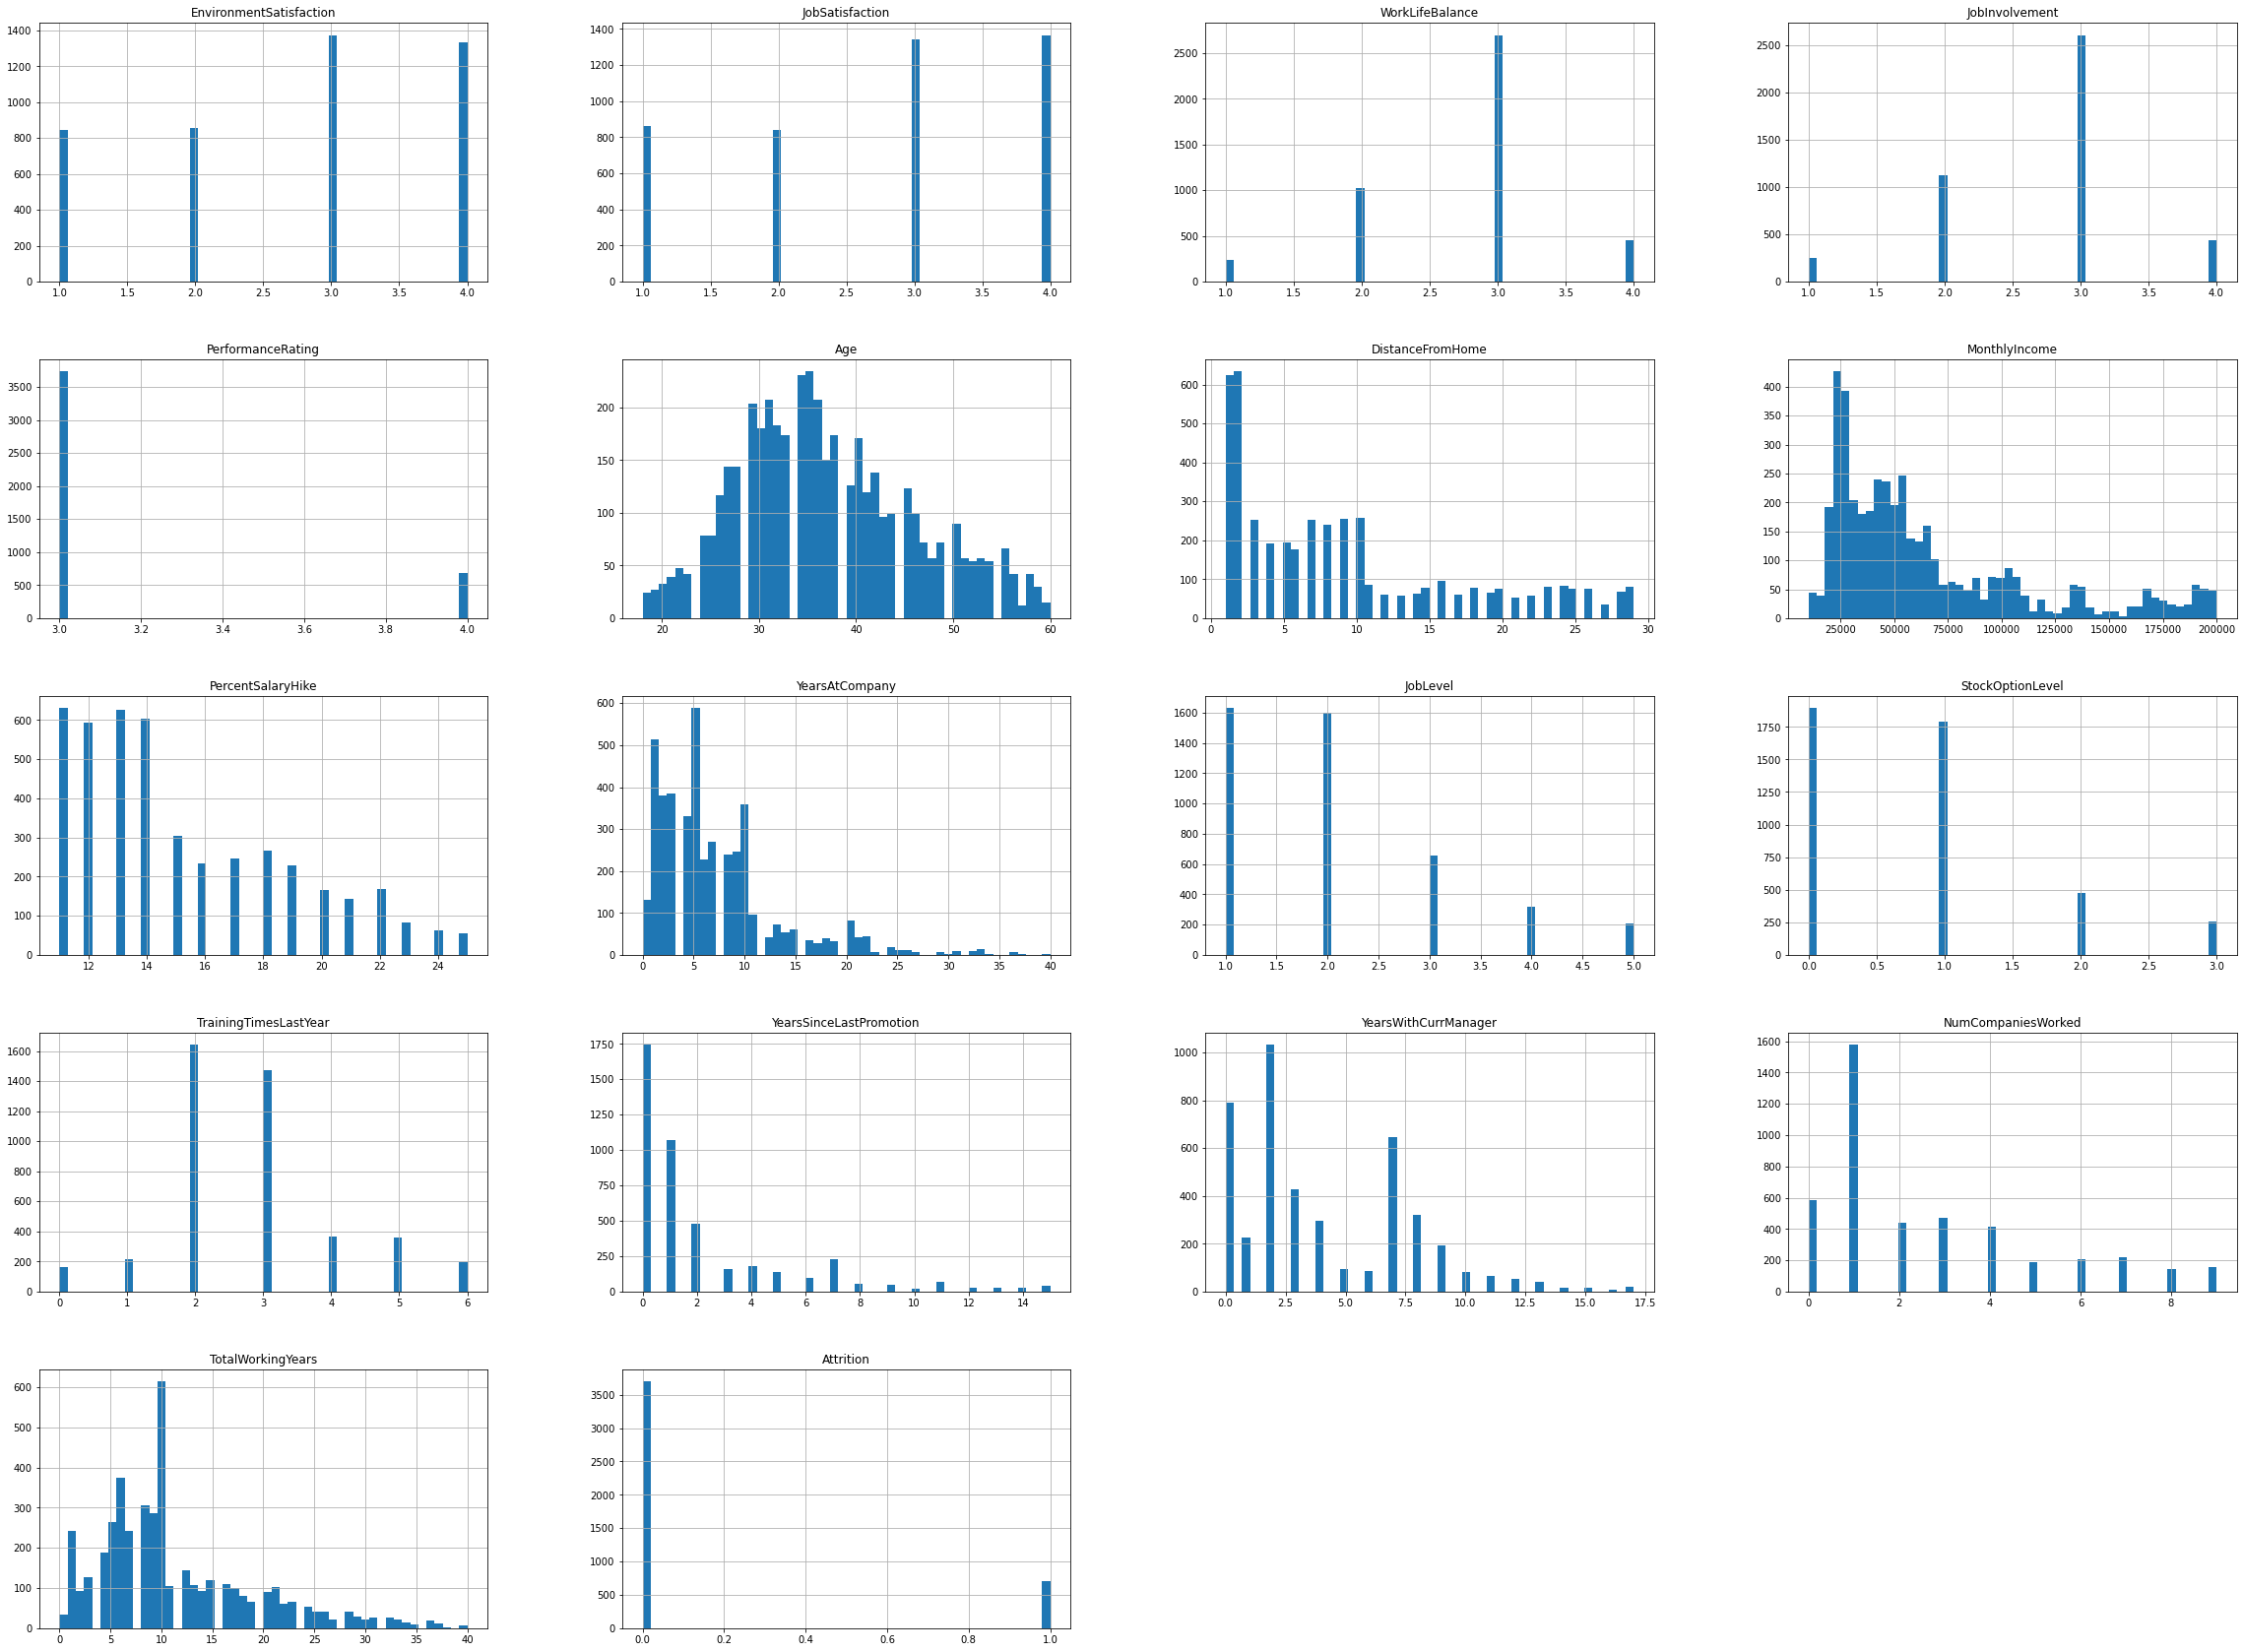

In [84]:
#histogramas de los empleados activos y retirados
df40.hist(bins=50, figsize=(40,30))
plt.show()

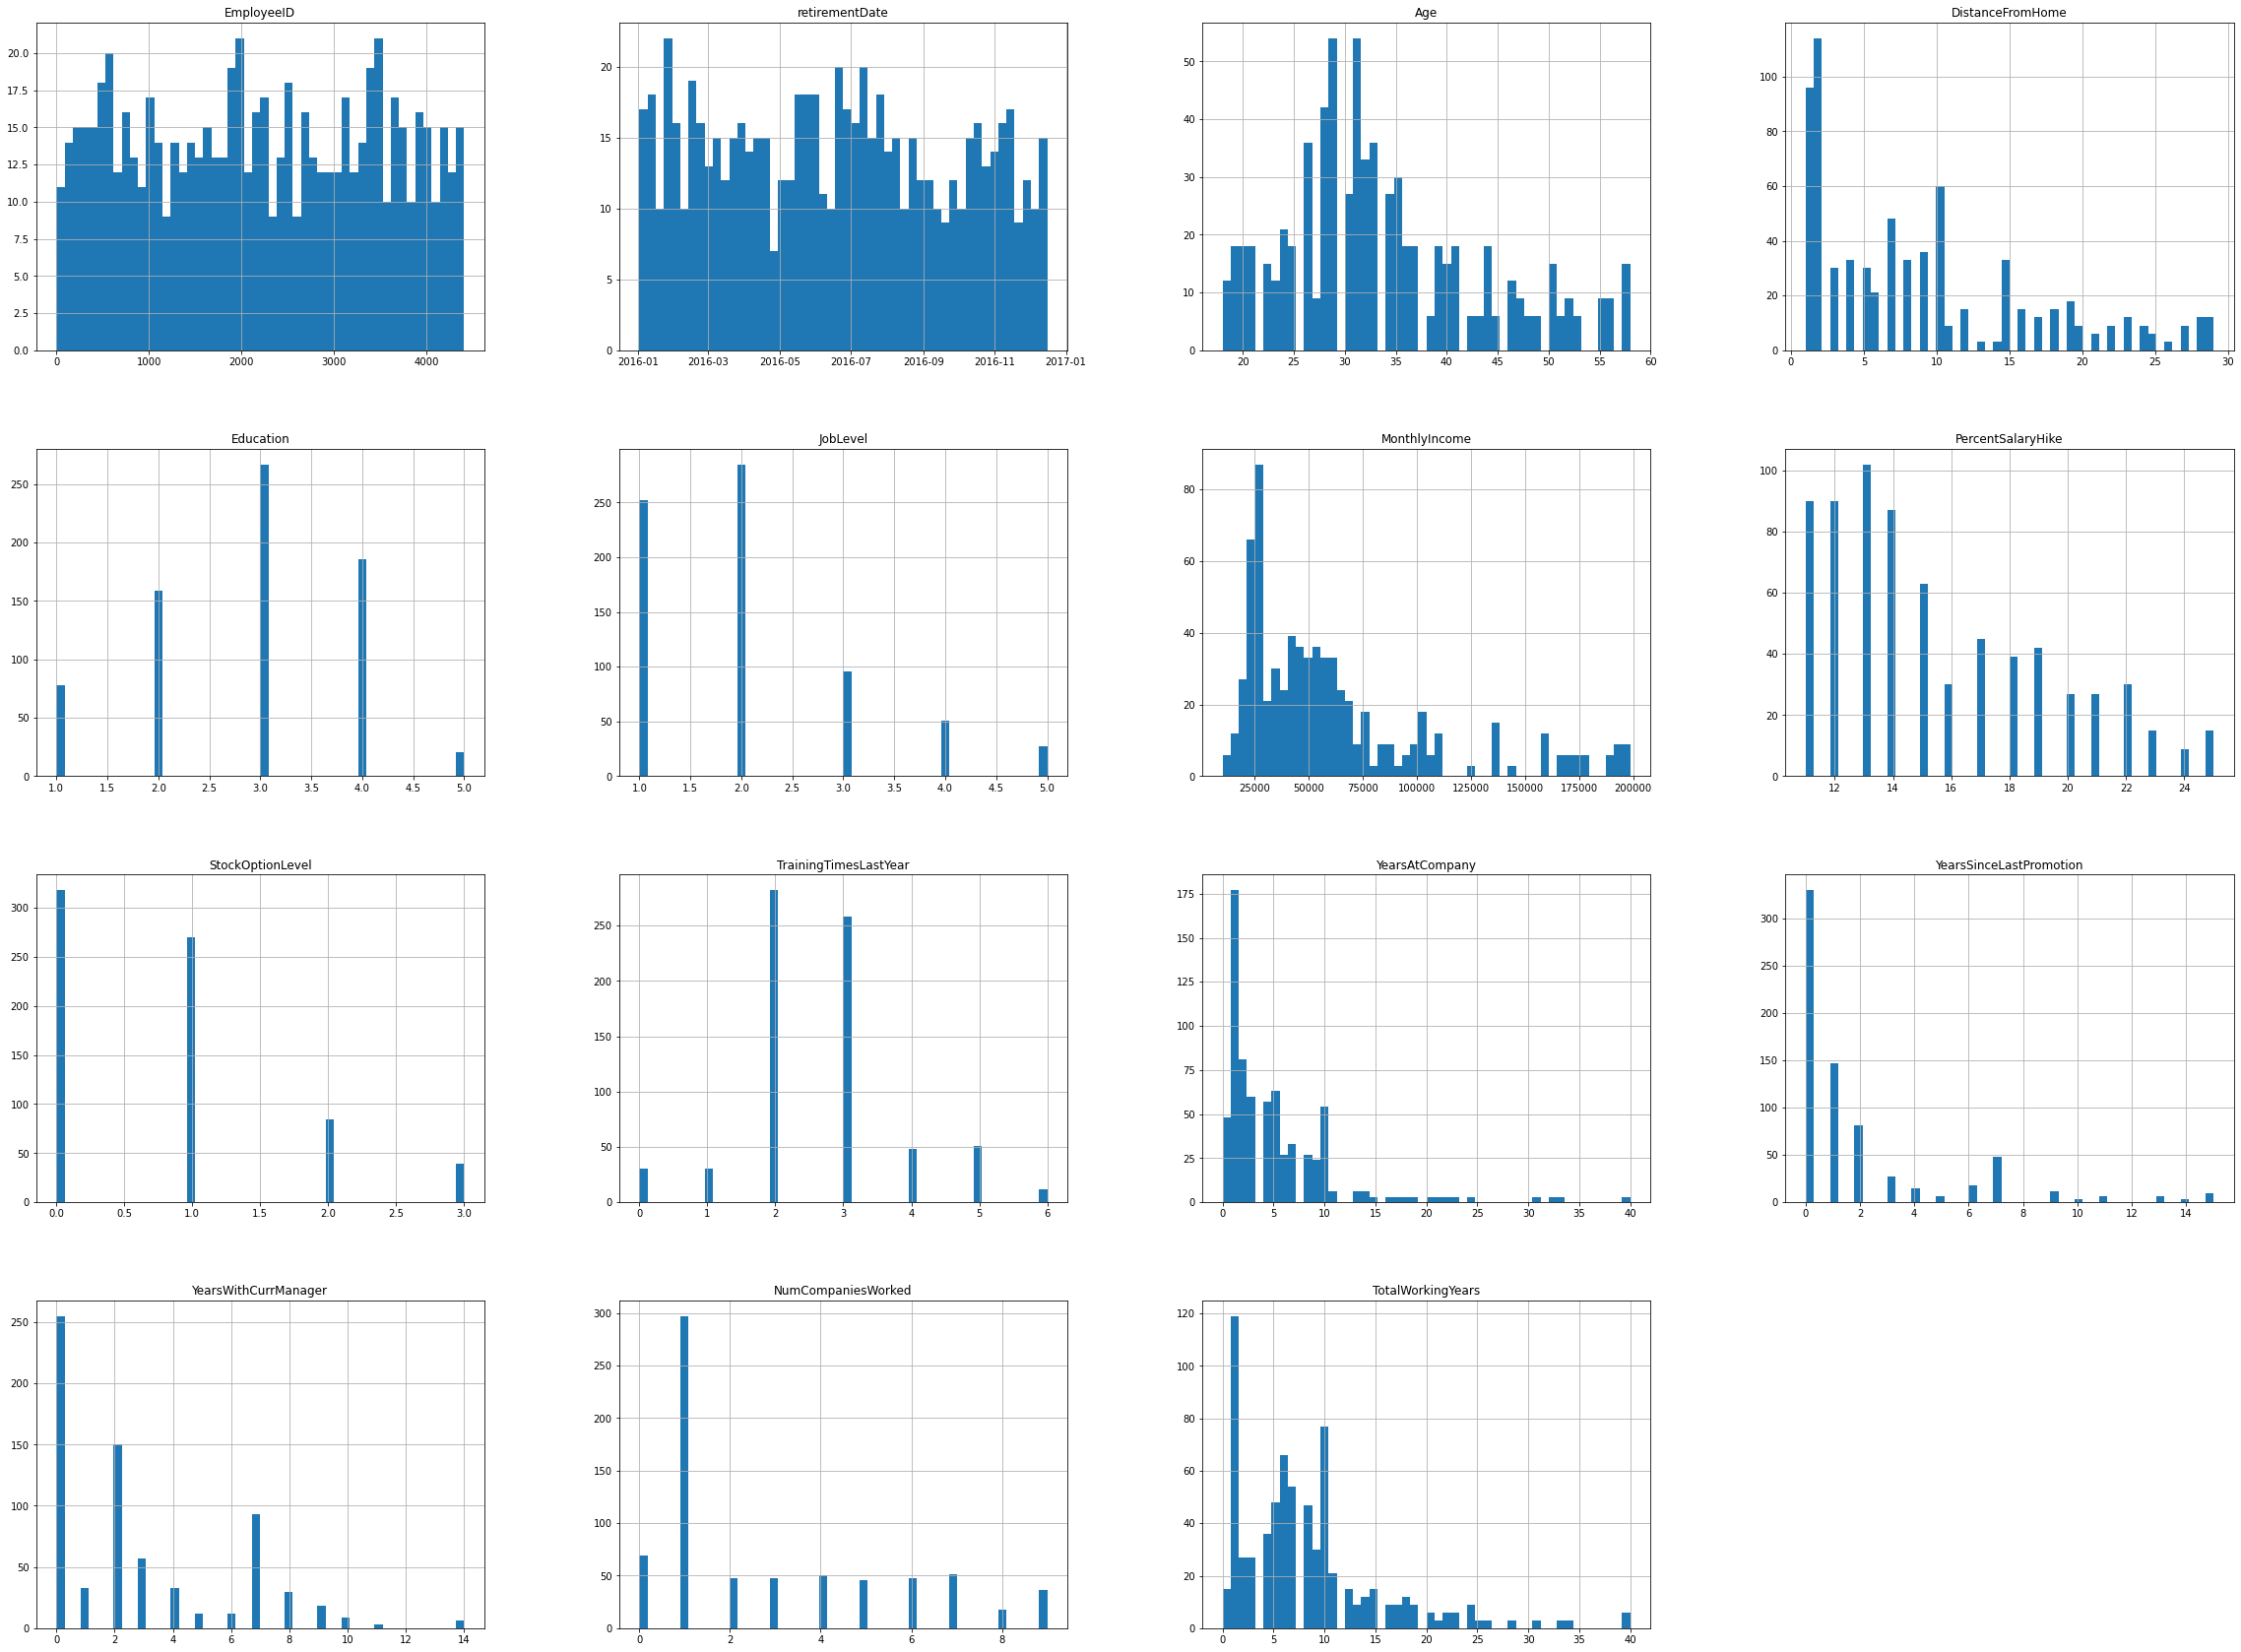

In [85]:
#Histograma de los empleados retirados
df_GR.hist(bins=50, figsize=(40,30))
plt.show()

## Bodega de datos

In [86]:
#Convertir a variables Dummies las categóricas nominales
df_cat = df_general[['EmployeeID', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
df_dummies=pd.get_dummies(df_cat, columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])
df_dummies

,EmployeeID,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4406,4407,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4407,4408,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4408,4409,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [87]:
df_general1 = df_general[['Age', 'DistanceFromHome', 'EmployeeID','MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'JobLevel', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked', 'TotalWorkingYears', 'Education']] #filtrar base de datos
df10 = pd.merge(df_employee_s, df_manager_s, on = 'EmployeeID', how='left') #unión de base de datos
df10 = pd.merge(df10, df_general1, on = 'EmployeeID', how='left') # unión de bases de datos 
df20 = pd.merge(df_retirement, df10, on = 'EmployeeID', how='left') # unión de bases de datos
df20= df20.astype({'TotalWorkingYears' : int }) # convertir a variable entera
df40 = pd.merge(df10, df_retirement, on = 'EmployeeID', how='left') # unión de base de datos
df_final = pd.merge(df40, df_dummies, on = 'EmployeeID', how='left') # union de bases de datos
df_final = df_final.fillna('0').drop(['retirementDate', 'retirementType','resignationReason'], axis = 1) # llenar los nulos con 0, eliminación de variables irrelevantes
df_final['Attrition'] = df_final['Attrition'].replace('Yes', 1).astype({'Attrition' : int }) #cambiar el Target por 1 si se retiro de la empresa, y cambiar el tipo de dato a entero
df_final = df_final.astype({'TotalWorkingYears' : int }) #convertir el tipo de dato a entero
df_final #construcción de bodega final de datos 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,3,4,2,3,3,51,6,131160,11,...,0,0,0,0,0,0,0,0,1,0
1,2,3,2,4,2,4,31,10,41890,23,...,0,0,0,0,1,0,0,0,0,1
2,3,2,2,1,3,3,32,17,193280,15,...,0,0,0,0,0,1,0,0,1,0
3,4,4,4,3,2,3,38,2,83210,11,...,0,0,0,0,0,0,0,0,1,0
4,5,4,1,3,3,3,32,10,23420,12,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,4,1,3,3,3,42,5,60290,17,...,0,0,0,0,1,0,0,0,0,1
4406,4407,4,4,3,2,3,29,2,26790,15,...,1,0,0,0,0,0,0,1,0,0
4407,4408,1,3,3,3,4,25,25,37020,20,...,0,0,0,0,0,1,0,0,1,0
4408,4409,4,1,3,2,3,42,18,23980,14,...,1,0,0,0,0,0,0,1,0,0


## Reescalado


1. Reescalado de las variables numéricas

In [88]:
y = df_final.Attrition #variable Target 
X = df_final.loc[:,~df_final.columns.isin(['Attrition','EmployeeID'])] #fuatures, sin variable target y el ID de empleados

In [89]:
#Aplicar método de Reescalado a las variables numéricas
arreglo = X.values 

scalador = MinMaxScaler(feature_range=(0,1))
dReescalados = scalador.fit_transform(arreglo)
np.set_printoptions(precision=2, suppress=True)
print(dReescalados)

[[0.67 1.   0.33 ... 0.   1.   0.  ]
 [0.67 0.33 1.   ... 0.   0.   1.  ]
 [0.33 0.33 0.   ... 0.   1.   0.  ]
 ...
 [0.   0.67 0.67 ... 0.   1.   0.  ]
 [1.   0.   0.67 ... 1.   0.   0.  ]
 [0.   0.67 0.67 ... 1.   0.   0.  ]]


In [90]:
list1 = dReescalados.tolist() 
df_R = pd.DataFrame(list1) #convertir a DataFrame
lista = X.columns
for i in range(len(lista)):
    df_R = df_R.rename(columns= {i : lista[i]}) 
df_R


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.666667,1.000000,0.333333,0.666667,0.0,0.785714,0.178571,0.637546,0.000000,0.025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.333333,1.000000,0.333333,1.0,0.309524,0.321429,0.167457,0.857143,0.125,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.333333,0.000000,0.666667,0.0,0.333333,0.571429,0.964666,0.285714,0.125,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.666667,0.333333,0.0,0.476190,0.035714,0.385045,0.000000,0.200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.000000,0.000000,0.666667,0.666667,0.0,0.333333,0.321429,0.070195,0.071429,0.150,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,1.000000,0.000000,0.666667,0.666667,0.0,0.571429,0.142857,0.264350,0.428571,0.075,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4406,1.000000,1.000000,0.666667,0.333333,0.0,0.261905,0.035714,0.087941,0.285714,0.075,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4407,0.000000,0.666667,0.666667,0.666667,1.0,0.166667,0.857143,0.141811,0.642857,0.100,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4408,1.000000,0.000000,0.666667,0.333333,0.0,0.571429,0.607143,0.073144,0.214286,0.225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
X = df_R #features 

## Selección de variables

In [93]:
#Selección de variables por kBest, se muestran las 5 más relevantes
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
kBest = SelectKBest(score_func = f_classif, k = 5)
fit = kBest.fit(X,y)
fit.
# var_names = fit.get_feature_names_out()
# var_names 

SelectKBest(k=5)

In [ ]:
# Variables seleccionadas por este método: 'JobSatisfaction', 'Age', 'YearsAtCompany', 'YearsWithCurrManager','TotalWorkingYears', 'BusinessTravel_Travel_Frequently','MaritalStatus_Single'

In [ ]:
# Construcción de modelos 
m_svm = SVC()
m_rlog = LogisticRegression(solver='liblinear')
m_treeC= DecisionTreeClassifier()
m_NB =  GaussianNB()
m_f= RandomForestClassifier()
m_k = KNeighborsClassifier()

modelos=list([m_svm, m_rlog, m_treeC, m_NB, m_f, m_k])

In [ ]:
#función para seleccionar variables 
def sel_variables(modelos,X,y, SelectFromModel,np,threshold):
    
    var_names_ac=np.array([])
    for modelo in modelos:
        try:
            modelo.fit(X,y)
            sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
            var_names= sel.get_feature_names_out(modelo.feature_names_in_)
            var_names_ac=np.append(var_names_ac, var_names)
            var_names_ac=np.unique(var_names_ac)
        except ValueError:
            pass
        var_names_ac = np.unique(var_names_ac)
    return var_names_ac

In [ ]:
#con threshold="mean", se muestran 22 variables
var_names=sel_variables(modelos,X,y,SelectFromModel,np,threshold="mean")
var_names

array(['Age', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Medical',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobRole_Research Director', 'JobSatisfaction',
       'MaritalStatus_Single', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [ ]:
#Variables seleccionadas: 'Age', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'DistanceFromHome', 'Education', 'EducationField_Human Resources', 'EnvironmentSatisfaction',
#'JobInvolvement', 'JobLevel', 'JobRole_Research Director','JobSatisfaction', 'MaritalStatus_Single', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
#'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager'

In [ ]:
#Se toma threshold= "2.2*mean", para emprimir 10 variables relevantes
var_names=sel_variables(modelos,X,y,SelectFromModel,np,threshold="2.2*mean")
var_names

array(['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [ ]:
#variables seleccionadas 'Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears','YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager'

In [ ]:
#construcción de modelos, con diferentes número variables 
X2 = X[['Age', 'MonthlyIncome', 'TotalWorkingYears']]

X3 = X[['Age', 'YearsAtCompany', 'YearsWithCurrManager',
       'TotalWorkingYears', 'MaritalStatus_Single']]

X4 = X[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

X5 = X[['Age', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'DistanceFromHome', 'Education',
       'EducationField_Human Resources', 'EducationField_Medical',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobRole_Research Director', 'JobSatisfaction',
       'MaritalStatus_Single', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [ ]:
#Definión de función para medir modelos, y servir de base para la selección de variables
def medir_modelos(modelos,X,y, scoring,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, cv = cv, scoring =scoring )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=['SVC()', 'LogisticRegression()', 'GaussianNB()',  'DecisionTreeClassifier()','RandomForestClassifier()', 'KNeighborsClassifier()']
    return metric_modelos


In [ ]:
#construcción de dataFrame con medidadas de desempeño de difererentes modelos, para cada uno de los grupos de variables
score_1 = medir_modelos([SVC(), LogisticRegression(), GaussianNB(),  DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()],X,y, 'recall', kfold, cross_val_score,pd)
score_2 = medir_modelos([SVC(), LogisticRegression(), GaussianNB(),  DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()],X2,y, 'recall', kfold, cross_val_score,pd)
score_3 = medir_modelos([SVC(), LogisticRegression(), GaussianNB(),  DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()],X3,y, 'recall', kfold, cross_val_score,pd)
score_4 = medir_modelos([SVC(), LogisticRegression(), GaussianNB(),  DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()],X4,y, 'recall', kfold, cross_val_score,pd)
score_5 = medir_modelos([SVC(), LogisticRegression(), GaussianNB(),  DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()],X5,y, 'recall', kfold, cross_val_score,pd)


In [ ]:
score_1['Type'] = 'All' #desempeño con todas las variables
score_2['Type'] = '3' #desempeño de 5 variables
score_3['Type'] = '5' # desempeño de 7 variables
score_4['Type'] = '10' # desempeño de 10 variables
score_5['Type'] = '22' # desempeño de 22 variables

In [ ]:
scoreF = pd.concat([score_1, score_2, score_3, score_4, score_5 ], axis = 0) #union de todos los desempeños por modelos

In [ ]:
#BoxPlots de todos los modelos por grupo de variables
fig = go.Figure()
for column in scoreF.columns[:-1]:
    fig.add_trace(go.Box(
        y = scoreF[column],
        x = scoreF.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'Score',
    xaxis_title = 'Número de variables',
    boxmode = 'group',
    colorway = px.colors.sequential.ice,
    width = 1200
)

fig.show()

Las variables seleccionadas son: 

    'Age'

    'MonthlyIncome'

    'TotalWorkingYears'




In [ ]:
X =X2

## Desempeño modelos

### Decision Tree Classifier

        k-fold Cross-Validation

In [ ]:
#Settear el kfold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#Entrenamiento y pruebas
regr = DecisionTreeClassifier()
results = cross_val_score(regr, X, y, cv=kfold)

#Score-puntaje
print("Precisión con k-fold Cross-Validation: ", results.mean()*100)

Precisión con k-fold Cross-Validation:  99.77324263038548


        Accuracy

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #particiones 
model = DecisionTreeClassifier() #creación de modelo 
score = 'accuracy' 
resultado = cross_val_score(model,X,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  99.77324263038548


        Area Under ROC Curve

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #Settear el kfold
model = DecisionTreeClassifier() #Entrenamiento y pruebas
score = 'roc_auc'
resultado = cross_val_score(model,X,y,cv=kfold,scoring=score)
print("AUC-ROC: ",resultado.mean()*100) #Score-puntaje

AUC-ROC:  99.62729658792651


        Logistic Loss

In [ ]:
#Settear el kfold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#Entrenamiento y pruebas
regr = DecisionTreeClassifier()
score = 'neg_log_loss'
resultado = cross_val_score(regr,X,y,cv=kfold,scoring=score)

#Score-puntaje
print("Precisión con Logistic Loss",resultado.mean()*-1*100)

Precisión con Logistic Loss 7.832030873779873


        classification report

In [ ]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = DecisionTreeClassifier() #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)
reporte = classification_report(Y_test, predicted)
print(reporte)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1215
           1       0.88      0.93      0.90       241

    accuracy                           0.97      1456
   macro avg       0.93      0.95      0.94      1456
weighted avg       0.97      0.97      0.97      1456



In [ ]:
results = cross_validate(DecisionTreeClassifier(),X,y,return_train_score=True,cv=5) #evaluación de overfitting y underfitting
results
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores)) # score de entrenamiento 
print(np.mean(test_scores)) #score de prueba

1.0
0.9995464852607711


No se percibe una diferencia de gran magnitud enntre los score de entrenamiento y de prueba, lo que nos indicaría que la varianza es muy pequeña, permitiendo conluir que no hay presencia de overfitting. Por otro lado, el score es bastante bueno, lo que nos indicaría que el sesgo es muy pequeño, permitiendo concluir que no hay presencia de underfitting.  Con esto, de forma general, se puede decir que este modelo esta encajando de una forma muy cercana con los datos.

        validation curve

In [ ]:
#creación de la curva de validación, para analizar el comportamiento de los dos score
train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
                                            X,
                                            y,
                                            param_name= "max_depth" ,
                                            param_range= np.arange(1, 80, 2),
                                            cv=15, scoring="accuracy", n_jobs=-1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

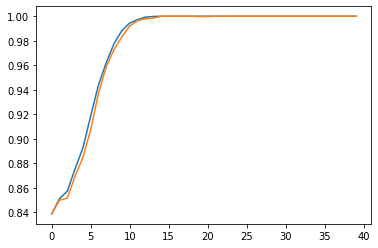

In [ ]:
plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks();

Buen comportamiento de aprendizaje tanto para entrenamiento como en prueba

        Matrix de confusión

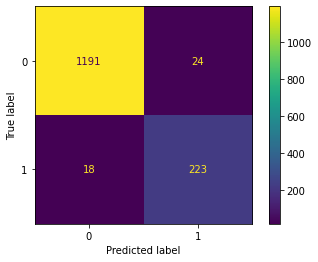

In [ ]:
test_size = 0.33
seed = 7 #semilla
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed) #separación de datos 
model = DecisionTreeClassifier() #cración del modelo 
model.fit(X_train, Y_train) #entrenamiento del modelo 
predicted = model.predict(X_test) #predecir con datos de prueba 
matrix = confusion_matrix (Y_test, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

La mayoría de datos están ubicados en los cuadrantes de verdaros postivos y verdaderos negativos 

In [ ]:
# Error de test del modelo final
# ==============================================================================
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
predicted[:10]
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicted,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy}%")

El accuracy de test es: 97.11538461538461%


### Random Forest Classifier

        k-fold Cross-Validation

In [ ]:
#Settear el kfold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#Entrenamiento y pruebas
regr = RandomForestClassifier()
results = cross_val_score(regr, X, y, cv=kfold)

#Score-puntaje
print("Precisión con k-fold Cross-Validation: ", results.mean()*100)

Precisión con k-fold Cross-Validation:  99.75056689342404


        Accuracy

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #particiones
model = RandomForestClassifier() #creación del modelo
score = 'accuracy' 
resultado = cross_val_score(model,X,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  99.75056689342404


        Area under ROC curve

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #Settear el kfold
model = RandomForestClassifier() #Entrenamiento y pruebas
score = 'roc_auc'
resultado = cross_val_score(model,X,y,cv=kfold,scoring=score)
print("AUC-ROC: ",resultado.mean()*100) #Score-puntaje

AUC-ROC:  99.6863347906207


        Logistic Loss

In [ ]:
#Settear el kfold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#Entrenamiento y pruebas
regr = RandomForestClassifier()
score = 'neg_log_loss'
resultado = cross_val_score(regr,X,y,cv=kfold,scoring=score)

#Score-puntaje
print("Precisión con Logistic Loss",resultado.mean()*-1*100)

Precisión con Logistic Loss 5.528863220870587


        Classification_report

In [ ]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = RandomForestClassifier() #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)
reporte = classification_report(Y_test, predicted)
print(reporte)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1215
           1       0.96      0.91      0.94       241

    accuracy                           0.98      1456
   macro avg       0.97      0.95      0.96      1456
weighted avg       0.98      0.98      0.98      1456



In [ ]:
results = cross_validate(RandomForestClassifier(),X,y,return_train_score=True,cv=5) #evaluación de overfitting y underfitting
results
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores)) # score de entrenamiento 
print(np.mean(test_scores)) #score de prueba

1.0
0.9995464852607711


No existe diferencia entre los score de entrenamiento y de prueba, lo que nos indicaría que la varianza es casi nula, permitiendo conluir que no hay presencia de overfitting. Por otro lado, el score es bastante bueno, lo que nos indicaría que no hay existencia de sesgo , permitiendo concluir que no hay presencia de underfitting.  Con esto, de forma general, se puede decir que este modelo esta encajando perfectamente con los datos.

        Validation curve

In [ ]:
param_range = np.arange(1, 250, 2)

In [ ]:
train_scores, test_scores = validation_curve(RandomForestClassifier(), #creación de la curva de validación con el modelo 
                                  X, y, param_name="n_estimators", param_range=param_range,
                                  cv=4, scoring="accuracy", n_jobs=-1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
print(train_std.mean()) 
print(test_std.mean())

5.2080788308570394e-05
0.0004872490121123428


Nos muestra que la desviación de los datos es muy pequeña, garantizando la no existencia de underfitting

In [ ]:
print(train_mean.mean()) 
print(test_mean.mean())

0.9997145873196316
0.9992689809840513


Los dos valores son muy similares, no hay presencia de varianza significativamente grande, por lo que se garantiza no overfitting 

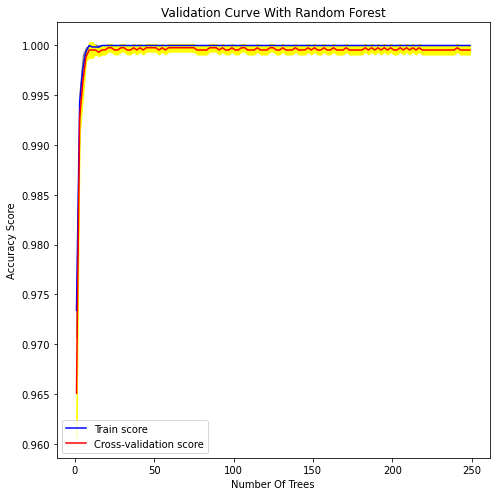

In [ ]:
#comandos para graficar
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Train score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="grey")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="yellow")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

        Learning curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50)) 
#creación de la curva de aprendizaje con el modelo 

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

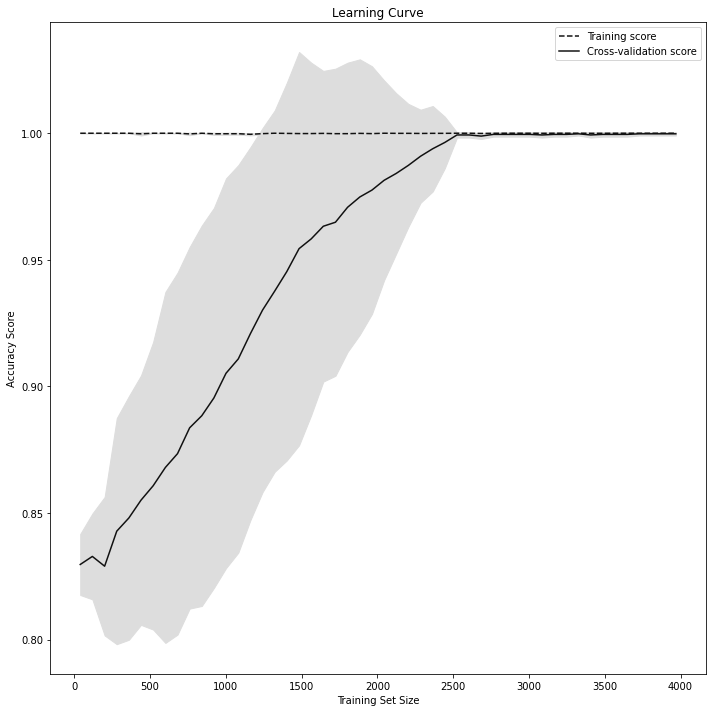

In [ ]:
#comandos para graficar
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Buen comportamiento de aprendizaje

        Matrix de confusión

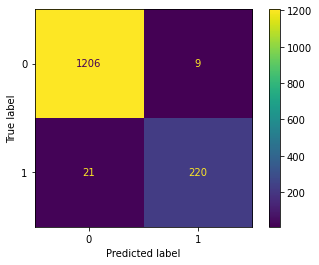

In [ ]:
test_size = 0.33
seed = 7 #semilla
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed) #separación de datos 
model = RandomForestClassifier() #cración del modelo 
model.fit(X_train, Y_train) #entrenamiento del modelo 
predicted = model.predict(X_test) #predecir con datos de prueba 
matrix = confusion_matrix(Y_test, predicted,labels=[1,0])

matrix = confusion_matrix (Y_test, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

La mayoría de datos están ubicados en los cuadrantes de verdaros postivos y verdaderos negativos 

In [ ]:
# Error de test del modelo final
# ==============================================================================
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
predicted[:10]
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicted,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy}%")

El accuracy de test es: 97.73351648351648%


Después de hacer la evaluación de desempeño y precisión, se decide trabajar con el modelo Random Forest Classifier debido a que es el que tiene mejores resultados

## Afinamiento de hiperparámetros

Luego de seleccionar el modelo Random Forest Classifier se procede a hacer la optimización de hiperparámetros

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150, 200, 250],
                 'max_features': [1, 2, 3],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, Y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 250} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'n_estimators': 250} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'n_estimators': 250} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'n_estimators': 200} ✓
Model

,oob_accuracy,criterion,max_depth,max_features,n_estimators
39,0.978673,entropy,NaN,2,150
7,0.978334,gini,NaN,3,200
41,0.978334,entropy,NaN,2,250
2,0.977996,gini,NaN,1,250


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150, 200, 250],
              'max_features': [1, 2, 3],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
3,gini,None,2,150,0.825896,0.038782,1.000000,0.000000
0,gini,None,1,150,0.825236,0.032192,1.000000,0.000000
30,gini,20,2,150,0.823914,0.038026,0.999637,0.001359
37,entropy,None,1,200,0.823500,0.036718,1.000000,0.000000


Los hiperparametros que mejor comportamiento tienen son: 
n_estimators=150, criterion="gini" o "entropy", max_depth= None, max_features= 5

## Evaluación de modelos con variación de parámetro

        Con criterion= entropy

In [ ]:
model_f1 = RandomForestClassifier(n_estimators=150, criterion="entropy", max_depth= None, max_features=2) # creación del modelo con ajuste de hiperparametros
model_f2 = RandomForestClassifier(n_estimators=150, criterion="gini", max_depth= None, max_features=2) # creación del modelo con ajuste de hiperparametros

In [ ]:
score_6 = cross_val_score(model_f1,X,y,cv=kfold,scoring='recall') # desempeño por cross val score

In [ ]:
score_6 =pd.DataFrame(score_6) #convertir a DataFrame
score_6['Type'] = '3_v_F' # crear columna llamada "type" para diferenciar los grupos de variables

In [ ]:
score_6 = score_6.rename(columns = {0 : 'RandomForestClassifier()'} ) #renombrar por el nombre del modelo
score = pd.concat([scoreF[['RandomForestClassifier()', 'Type' ]], score_6 ], axis = 0) # unir el modelo ajustado con los demás modelos 

In [ ]:
#comandos de graficas
fig = go.Figure()
for column in score.columns[:-1]:
    fig.add_trace(go.Box(
        y = score[column],
        x = score.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

        k-fold Cross-Validation

In [ ]:
#Settear el kfold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#Entrenamiento y pruebas
results = cross_val_score(model_f1, X, y, cv=kfold)

#Score-puntaje
print("Precisión con k-fold Cross-Validation: ", results.mean()*100)

Precisión con k-fold Cross-Validation:  99.75056689342404


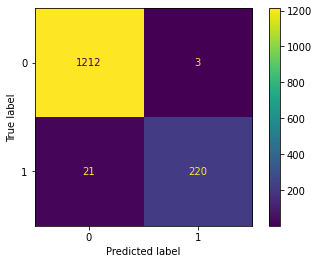

In [ ]:
test_size = 0.33
seed = 7 #semilla
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed) #separación de datos 
 #cración del modelo 
model_f1.fit(X_train, Y_train) #entrenamiento del modelo 
predicted = model_f1.predict(X_test) #predecir con datos de prueba 
matrix = confusion_matrix(Y_test, predicted,labels=[1,0])

matrix = confusion_matrix (Y_test, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

        Accuracy

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #particiones
score = 'accuracy' 
resultado = cross_val_score(model_f1,X,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  99.75056689342404


In [ ]:

# Error de test del modelo final
# ==============================================================================
predicciones = model_f1.predict(X = X_test)
predicciones[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy}%")

El accuracy de test es: 98.35164835164835%


con criterion = gini

In [ ]:
score_6 = cross_val_score(model_f2,X,y,cv=kfold,scoring='recall') # desempeño por cross val score
score_6 =pd.DataFrame(score_6) #convertir a DataFrame
score_6['Type'] = '3_v_F' # crear columna llamada "type" para diferenciar los grupos de variables
score_6 = score_6.rename(columns = {0 : 'RandomForestClassifier()'} ) #renombrar por el nombre del modelo
score = pd.concat([scoreF[['RandomForestClassifier()', 'Type' ]], score_6 ], axis = 0) # unir el modelo ajustado con los demás modelos 

In [ ]:
#comandos de graficas de boxplot
fig = go.Figure()
for column in score.columns[:-1]:
    fig.add_trace(go.Box(
        y = score[column],
        x = score.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

        k-fold Cross-Validation

In [ ]:
#Settear el kfold
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#Entrenamiento y pruebas
results = cross_val_score(model_f2, X, y, cv=kfold)

#Score-puntaje
print("Precisión con k-fold Cross-Validation: ", results.mean()*100)

Precisión con k-fold Cross-Validation:  99.75056689342404


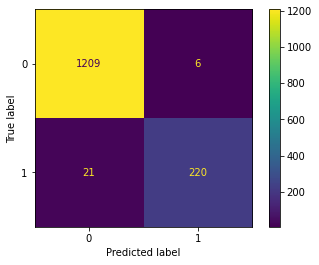

In [ ]:
test_size = 0.33
seed = 7 #semilla
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed) #separación de datos 
 #cración del modelo 
model_f2.fit(X_train, Y_train) #entrenamiento del modelo 
predicted = model_f2.predict(X_test) #predecir con datos de prueba 
matrix = confusion_matrix(Y_test, predicted,labels=[1,0])

matrix = confusion_matrix (Y_test, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True) #particiones
score = 'accuracy' 
resultado = cross_val_score(model_f2,X,y,cv=kfold,scoring=score)
print("Accuracy: ",resultado.mean()*100)

Accuracy:  99.75056689342404


In [ ]:
# Error de test del modelo final
# ==============================================================================
model_f2.fit(X_train, Y_train)
predicted = model_f2.predict(X_test)
predicted[:10]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
predicted[:10]
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicted,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy}%")

El accuracy de test es: 98.1456043956044%


No hay cambios en en el parametro creterion con relacion a gini y entropy, por lo que se decide trabajar con gini, por lo que no se altere el modelo al elegir el uno o el otro.

Después de hacer el ajuste de hiperparametros, se obtiene que hay una leve mejora en el rendiemito con relación al modelo anteriormente seleccionado 

In [ ]:
#modelo final => model_f2 = RandomForestClassifier(n_estimators=150, criterion="gini", max_depth= None, max_features=2)
model_final = model_f2 

## Despliegue 

In [ ]:
#Exportar y guardar
joblib.dump(model_final, "model_final.pkl")

['model_final.pkl']

In [ ]:
##Cargar modelo y predecir
model_final = joblib.load("model_final.pkl")
predicciones=model_final.predict(X)


In [ ]:
pd_pred=pd.DataFrame(predicciones[:4410])
pd_pred
ID_emp=df_final['EmployeeID']
ret_pred=pd.concat([ID_emp,pd_pred],axis=1)
ret_pred.rename(columns = {0 : 'Attrition'}, inplace = True)
ret_pred

,EmployeeID,Attrition
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
4405,4406,0
4406,4407,0
4407,4408,0
4408,4409,0


In [ ]:
ret_pred.query('Attrition == 1')

,EmployeeID,Attrition
1,2,1
6,7,1
13,14,1
28,29,1
30,31,1
...,...,...
4381,4382,1
4386,4387,1
4388,4389,1
4391,4392,1


In [ ]:
ret_pred.to_excel("prediccion.xlsx")